In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# mostrar todas las columnas del dataframe
pd.set_option('display.max_columns', None)
# mostrar los numeros sin notacion cientifica
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [42]:
# leer df retail_data.csv
df_retail_data = pd.read_csv('retail_data.csv')

In [43]:
df_retail_data.head(10)

,customer_id,age,gender,income_bracket,loyalty_program,membership_years,churned,marital_status,number_of_children,education_level,occupation,transaction_id,transaction_date,product_id,product_category,quantity,unit_price,discount_applied,payment_method,store_location,transaction_hour,day_of_week,week_of_year,month_of_year,avg_purchase_value,purchase_frequency,last_purchase_date,avg_discount_used,preferred_store,online_purchases,in_store_purchases,avg_items_per_transaction,avg_transaction_value,total_returned_items,total_returned_value,total_sales,total_transactions,total_items_purchased,total_discounts_received,avg_spent_per_category,max_single_purchase_value,min_single_purchase_value,product_name,product_brand,product_rating,product_review_count,product_stock,product_return_rate,product_size,product_weight,product_color,product_material,product_manufacture_date,product_expiry_date,product_shelf_life,promotion_id,promotion_type,promotion_start_date,promotion_end_date,promotion_effectiveness,promotion_channel,promotion_target_audience,customer_zip_code,customer_city,customer_state,store_zip_code,store_city,store_state,distance_to_store,holiday_season,season,weekend,customer_support_calls,email_subscriptions,app_usage,website_visits,social_media_engagement,days_since_last_purchase
0,1,56,Other,High,No,0,No,Divorced,3,Bachelor's,Self-Employed,503290,2020-10-11 10:08:52,1480,Electronics,8,49.720,0.500,Credit Card,Location A,18,Wednesday,27,7,411.130,Weekly,2021-09-11 04:22:38,0.020,Location A,55,86,8.640,171.830,0,750.400,563.160,69,367,415.010,114.280,679.250,0.280,Product D,Brand Y,2.500,560,48,0.400,Small,4.610,Red,Metal,2019-08-04 01:47:01,2022-05-28 14:54:02,250,271,20% Off,2021-07-14 14:28:42,2022-12-30 13:04:13,High,Online,New Customers,37848,City D,State Y,88500,City D,State Y,33.210,No,Spring,Yes,5,No,High,30,High,40
1,2,69,Female,Medium,No,2,No,Married,2,PhD,Unemployed,347796,2021-12-08 01:07:40,1597,Groceries,7,817.760,0.320,Credit Card,Location C,15,Friday,20,2,268.710,Daily,2021-05-16 12:01:16,0.330,Location C,48,2,9.600,20.180,4,551.600,7554.570,8,475,801.790,305.950,491.560,4.650,Product C,Brand X,4.700,413,80,0.300,Medium,0.840,Blue,Metal,2019-10-23 19:59:17,2022-12-19 08:04:41,180,631,Flash Sale,2021-09-23 04:26:09,2022-09-13 03:16:26,Low,Social Media,New Customers,44896,City A,State X,30046,City C,State X,62.560,No,Summer,Yes,6,No,High,40,Medium,338
2,3,46,Female,Low,No,5,No,Married,3,Bachelor's,Self-Employed,493688,2020-02-17 09:40:48,5142,Toys,8,270.300,0.350,Debit Card,Location A,9,Saturday,35,6,246.790,Weekly,2021-02-07 16:47:48,0.470,Location B,16,45,1.550,55.170,0,629.190,7564.140,73,138,264.310,426.700,938.260,7.300,Product B,Brand X,4.600,312,14,0.080,Medium,0.230,Green,Plastic,2018-05-12 08:00:29,2023-02-01 12:15:07,131,879,Flash Sale,2021-06-13 12:31:15,2022-03-13 00:53:35,Low,Online,New Customers,11816,City B,State X,26169,City A,State Y,83.040,Yes,Winter,Yes,2,Yes,Low,89,Medium,61
3,4,32,Female,Low,No,0,No,Divorced,2,Master's,Employed,861348,2020-08-13 00:43:14,8447,Toys,2,547.840,0.100,Credit Card,Location A,13,Friday,42,8,178.920,Weekly,2021-12-30 23:48:26,0.410,Location B,50,47,1.780,15.790,3,346.670,8125.920,20,158,192.930,689.580,644.310,7.310,Product A,Brand Z,1.100,110,69,0.090,Large,4.370,Blue,Wood,2019-11-15 16:17:29,2023-02-05 11:46:57,16,211,Buy One Get One Free,2021-05-23 05:42:48,2022-02-06 00:42:30,High,Social Media,Returning Customers,78604,City A,State Y,22667,City B,State Z,50.430,Yes,Winter,No,12,No,Low,12,Low,42
4,5,60,Female,Low,Yes,7,Yes,Divorced,2,Bachelor's,Employed,535835,2021-07-02 11:59:03,6025,Clothing,4,785.290,0.170,Mobile Payment,Location C,17,Monday,37,3,214.060,Yearly,2021-11-02 11:48:25,0.220,Location B,48,42,9.380,240.030,2,979.910,114.320,83,263,497.260,715.860,162.860,1.920,Product C,Brand X,3.800,172,25,0.390,Small,1.680,Red,Metal,2019-08-27 02:58:19,2023-10-05 08:13:07,57,862,Flash Sale,2021-04-19 04:55:32,2022-12-04 13:07:09,Medium,Online,New Customers,17760,City

1. **customer_id**: Identificación única del cliente.
2. **age**: Edad del cliente.
3. **gender**: Género del cliente.
4. **income_bracket**: Rango de ingresos del cliente (Alto, Medio, Bajo).
5. **loyalty_program**: Indica si el cliente está en un programa de lealtad.
6. **membership_years**: Años de membresía en el programa de lealtad.
7. **churned**: Indica si el cliente ha dejado de usar los servicios.
8. **marital_status**: Estado civil del cliente (Soltero, Casado, Divorciado, etc.).
9. **number_of_children**: Número de hijos del cliente.
10. **education_level**: Nivel educativo del cliente.
11. **employment_status**: Estado laboral del cliente.
12. **occupation**: Ocupación del cliente.
13. **household_size**: Tamaño del hogar del cliente.
14. **home_owner**: Indica si el cliente es propietario de una vivienda.
15. **region**: Región donde reside el cliente.
16. **city**: Ciudad donde reside el cliente.
17. **preferred_store**: Tienda preferida por el cliente.
18. **total_spent**: Total gastado por el cliente.
19. **average_transaction_value**: Valor promedio por transacción del cliente.
20. **frequency_of_visits**: Frecuencia de visitas del cliente a la tienda.
21. **total_items_purchased**: Total de artículos comprados por el cliente.
22. **average_items_per_visit**: Promedio de artículos comprados por visita.
23. **most_purchased_category**: Categoría de producto más comprada por el cliente.
24. **total_discounts_received**: Total de descuentos recibidos por el cliente.
25. **average_discount_per_visit**: Descuento promedio por visita del cliente.
26. **coupon_usage**: Indica si el cliente usa cupones.
27. **total_coupons_used**: Total de cupones usados por el cliente.
28. **last_coupon_used**: Fecha del último cupón usado por el cliente.
29. **total_returns**: Total de devoluciones realizadas por el cliente.
30. **return_rate**: Tasa de devoluciones del cliente.
31. **average_return_value**: Valor promedio de las devoluciones del cliente.
32. **most_returned_category**: Categoría de producto más devuelta por el cliente.
33. **total_online_purchases**: Total de compras en línea del cliente.
34. **total_in_store_purchases**: Total de compras en tienda física del cliente.
35. **online_purchase_rate**: Tasa de compras en línea del cliente.
36. **in_store_purchase_rate**: Tasa de compras en tienda física del cliente.
37. **preferred_payment_method**: Método de pago preferido por el cliente.
38. **total_spent_online**: Total gastado en compras en línea.
39. **total_spent_in_store**: Total gastado en compras en tienda física.
40. **online_spending_rate**: Tasa de gasto en línea del cliente.
41. **in_store_spending_rate**: Tasa de gasto en tienda física del cliente.
42. **average_online_transaction_value**: Valor promedio por transacción en línea.
43. **average_in_store_transaction_value**: Valor promedio por transacción en tienda física.
44. **number_of_credit_cards**: Número de tarjetas de crédito del cliente.
45. **preferred_credit_card**: Tarjeta de crédito preferida por el cliente.
46. **total_credit_limit**: Límite total de crédito del cliente.
47. **credit_card_usage_rate**: Tasa de uso de tarjeta de crédito del cliente.
48. **total_debt**: Deuda total del cliente.
49. **debt_to_income_ratio**: Relación deuda-ingreso del cliente.
50. **total_savings**: Ahorros totales del cliente.
51. **savings_to_income_ratio**: Relación ahorros-ingreso del cliente.
52. **financial_risk_tolerance**: Tolerancia al riesgo financiero del cliente.
53. **investment_preference**: Preferencia de inversión del cliente.
54. **total_invested**: Total invertido por el cliente.
55. **preferred_investment_type**: Tipo de inversión preferido por el cliente.
56. **average_annual_return**: Retorno anual promedio de las inversiones del cliente.
57. **total_loan_amount**: Monto total de préstamos del cliente.
58. **loan_type**: Tipo de préstamo del cliente.
59. **loan_interest_rate**: Tasa de interés del préstamo del cliente.
60. **loan_term**: Plazo del préstamo del cliente.
61. **total_loan_payments**: Total de pagos de préstamos del cliente.
62. **monthly_loan_payment**: Pago mensual del préstamo del cliente.
63. **loan_to_value_ratio**: Relación préstamo-valor del cliente.
64. **total_insurance_premiums**: Total de primas de seguro del cliente.
65. **preferred_insurance_type**: Tipo de seguro preferido por el cliente.
66. **insurance_coverage_amount**: Monto de la cobertura del seguro del cliente.
67. **insurance_claims**: Reclamaciones de seguro del cliente.
68. **total_claims_amount**: Monto total de reclamaciones del cliente.
69. **claim_approval_rate**: Tasa de aprobación de reclamaciones del cliente.
70. **customer_satisfaction**: Nivel de satisfacción del cliente.
71. **feedback_comments**: Comentarios de retroalimentación del cliente.
72. **customer_complaints**: Quejas del cliente.
73. **resolved_complaints**: Quejas resueltas del cliente.
74. **complaint_resolution_time**: Tiempo de resolución de quejas del cliente.
75. **distance_to_store**: Distancia a la tienda.
76. **holiday_season**: Indica si la compra se hizo en temporada de vacaciones.
77. **season**: Estación del año.
78. **weekend**: Indica si la compra se hizo en fin de semana.
79. **customer_support_calls**: Llamadas al soporte al cliente.
80. **email_subscriptions**: Suscripciones por correo electrónico.
81. **app_usage**: Uso de la aplicación.
82. **website_visits**: Visitas al sitio web.
83. **social_media_engagement**: Compromiso en redes sociales.
84. **days_since_last_purchase**: Días desde la última compra.

In [44]:
# exporta las primeras 100 lineas a un excel 
df_retail_data.head(100).to_excel('retail_data_100.xlsx', index=False)

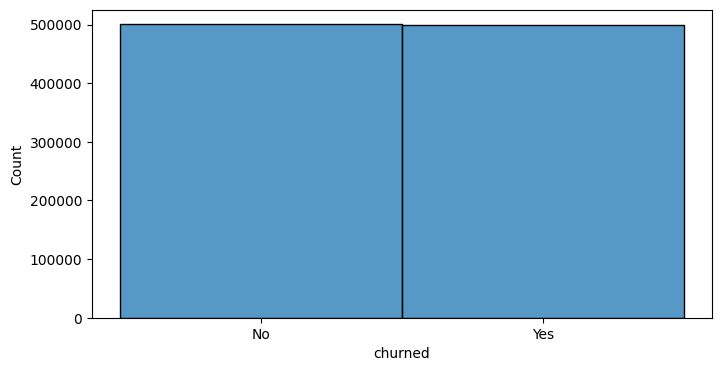

In [45]:
# grafica la distribucion de la columna 'churned' en un histograma

plt.figure(figsize=(8, 4))
sns.histplot(df_retail_data['churned'])
plt.show()

In [46]:
# analizar si hay valores nulos, mostrar todas las líneas y columnas
df_retail_data.isnull().sum() 


customer_id                 0
age                         0
gender                      0
income_bracket              0
loyalty_program             0
                           ..
email_subscriptions         0
app_usage                   0
website_visits              0
social_media_engagement     0
days_since_last_purchase    0
Length: 78, dtype: int64

In [47]:
# almacena en una tupla las columnas con formato fecha y posteriormente borralas del dataframe

date_columns = [col for col in df_retail_data.columns if 'date' in col] # esto es un list comprehension
df_retail_data.drop(columns=date_columns, inplace=True)

df_retail_data.head()

,customer_id,age,gender,income_bracket,loyalty_program,membership_years,churned,marital_status,number_of_children,education_level,occupation,transaction_id,product_id,product_category,quantity,unit_price,discount_applied,payment_method,store_location,transaction_hour,day_of_week,week_of_year,month_of_year,avg_purchase_value,purchase_frequency,avg_discount_used,preferred_store,online_purchases,in_store_purchases,avg_items_per_transaction,avg_transaction_value,total_returned_items,total_returned_value,total_sales,total_transactions,total_items_purchased,total_discounts_received,avg_spent_per_category,max_single_purchase_value,min_single_purchase_value,product_name,product_brand,product_rating,product_review_count,product_stock,product_return_rate,product_size,product_weight,product_color,product_material,product_shelf_life,promotion_id,promotion_type,promotion_effectiveness,promotion_channel,promotion_target_audience,customer_zip_code,customer_city,customer_state,store_zip_code,store_city,store_state,distance_to_store,holiday_season,season,weekend,customer_support_calls,email_subscriptions,app_usage,website_visits,social_media_engagement,days_since_last_purchase
0,1,56,Other,High,No,0,No,Divorced,3,Bachelor's,Self-Employed,503290,1480,Electronics,8,49.720,0.500,Credit Card,Location A,18,Wednesday,27,7,411.130,Weekly,0.020,Location A,55,86,8.640,171.830,0,750.400,563.160,69,367,415.010,114.280,679.250,0.280,Product D,Brand Y,2.500,560,48,0.400,Small,4.610,Red,Metal,250,271,20% Off,High,Online,New Customers,37848,City D,State Y,88500,City D,State Y,33.210,No,Spring,Yes,5,No,High,30,High,40
1,2,69,Female,Medium,No,2,No,Married,2,PhD,Unemployed,347796,1597,Groceries,7,817.760,0.320,Credit Card,Location C,15,Friday,20,2,268.710,Daily,0.330,Location C,48,2,9.600,20.180,4,551.600,7554.570,8,475,801.790,305.950,491.560,4.650,Product C,Brand X,4.700,413,80,0.300,Medium,0.840,Blue,Metal,180,631,Flash Sale,Low,Social Media,New Customers,44896,City A,State X,30046,City C,State X,62.560,No,Summer,Yes,6,No,High,40,Medium,338
2,3,46,Female,Low,No,5,No,Married,3,Bachelor's,Self-Employed,493688,5142,Toys,8,270.300,0.350,Debit Card,Location A,9,Saturday,35,6,246.790,Weekly,0.470,Location B,16,45,1.550,55.170,0,629.190,7564.140,73,138,264.310,426.700,938.260,7.300,Product B,Brand X,4.600,312,14,0.080,Medium,0.230,Green,Plastic,131,879,Flash Sale,Low,Online,New Customers,11816,City B,State X,26169,City A,State Y,83.040,Yes,Winter,Yes,2,Yes,Low,89,Medium,61
3,4,32,Female,Low,No,0,No,Divorced,2,Master's,Employed,861348,8447,Toys,2,547.840,0.100,Credit Card,Location A,13,Friday,42,8,178.920,Weekly,0.410,Location B,50,47,1.780,15.790,3,346.670,8125.920,20,158,192.930,689.580,644.310,7.310,Product A,Brand Z,1.100,110,69,0.090,Large,4.370,Blue,Wood,16,211,Buy One Get One Free,High,Social Media,Returning Customers,78604,City A,State Y,22667,City B,State Z,50.430,Yes,Winter,No,12,No,Low,12,Low,42
4,5,60,Female,Low,Yes,7,Yes,Divorced,2,Bachelor's,Employed,535835,6025,Clothing,4,785.290,0.170,Mobile Payment,Location C,17,Monday,37,3,214.060,Yearly,0.220,Location B,48,42,9.380,240.030,2,979.910,114.320,83,263,497.260,715.860,162.860,1.920,Product C,Brand X,3.800,172,25,0.390,Small,1.680,Red,Metal,57,862,Flash Sale,Medium,Online,New Customers,17760,City B,State Z,87843,City C,State X,36.550,Yes,Summer,Yes,3,No,Medium,31,Low,242


In [48]:
# haz un replace de los valores de la columna 'churned' donde No = 0 y Yes = 1

df_retail_data['churned'].replace({'No': 0, 'Yes': 1}, inplace=True)

In [49]:
df_retail_data['income_bracket'].unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [50]:
lista_top_20_variables = ['transaction_id', 'customer_zip_code', 'total_discounts_received',
       'avg_purchase_value', 'total_returned_value', 'avg_transaction_value',
       'avg_spent_per_category', 'max_single_purchase_value', 'total_sales',
       'unit_price', 'product_id', 'store_zip_code', 'distance_to_store',
       'min_single_purchase_value', 'product_review_count', 'product_weight',
       'promotion_id', 'avg_items_per_transaction', 'total_items_purchased',
       'product_shelf_life', 'churned']

In [51]:
# borrar del dataframe las columnas que no esten en la lista_top_20_variables

df_retail_data = df_retail_data[lista_top_20_variables]

In [52]:
# codificar las variables categoricas con one hot encoding con sklearn 
from sklearn.preprocessing import OneHotEncoder
# instanciar el objeto OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)

# codificar
encoded = ohe.fit_transform(df_retail_data.select_dtypes(include=['object']))

# convertir el resultado a un DataFrame
df_retail_data_encoded = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(df_retail_data.select_dtypes(include=['object']).columns))

# concatenar el DataFrame original con el DataFrame codificado
df_retail_data = pd.concat([df_retail_data.select_dtypes(exclude=['object']), df_retail_data_encoded], axis=1)

df_retail_data.head()

,transaction_id,customer_zip_code,total_discounts_received,avg_purchase_value,total_returned_value,avg_transaction_value,avg_spent_per_category,max_single_purchase_value,total_sales,unit_price,product_id,store_zip_code,distance_to_store,min_single_purchase_value,product_review_count,product_weight,promotion_id,avg_items_per_transaction,total_items_purchased,product_shelf_life,churned
0,503290,37848,415.010,411.130,750.400,171.830,114.280,679.250,563.160,49.720,1480,88500,33.210,0.280,560,4.610,271,8.640,367,250,0
1,347796,44896,801.790,268.710,551.600,20.180,305.950,491.560,7554.570,817.760,1597,30046,62.560,4.650,413,0.840,631,9.600,475,180,0
2,493688,11816,264.310,246.790,629.190,55.170,426.700,938.260,7564.140,270.300,5142,26169,83.040,7.300,312,0.230,879,1.550,138,131,0
3,861348,78604,192.930,178.920,346.670,15.790,689.580,644.310,8125.920,547.840,8447,22667,50.430,7.310,110,4.370,211,1.780,158,16,0
4,535835,17760,497.260,214.060,979.910,240.030,715.860,162.860,114.320,785.290,6025,87843,36.550,1.920,172,1.680,862,9.380,263,57,1


In [53]:
df_retail_data['churned']

0         0
1         0
2         0
3         0
4         1
         ..
999995    1
999996    1
999997    1
999998    1
999999    1
Name: churned, Length: 1000000, dtype: int64

In [55]:
# generar el dataframe de entrenamiento y el de prueba en un ratio 80/20 donde la variable objetivo es 'churned' 
from sklearn.model_selection import train_test_split

X = df_retail_data.drop(columns=['churned'])
y = df_retail_data['churned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:
# entrenar un modelo de regresion logistica con sklearn donde la variable objetivo es 'churned'

from sklearn.linear_model import LogisticRegression

# instanciar el objeto LogisticRegression

lr = LogisticRegression()

# entrenar el modelo
lr.fit(X_train, y_train)

# captura la historia de la precision del modelo en el conjunto de entrenamiento
train_score = lr.score(X_train, y_train)

# captura la historia de la precision del modelo en el conjunto de prueba
test_score = lr.score(X_test, y_test)

train_score, test_score 

c:\Users\JavierVelosoRios\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.50159625, 0.49928)

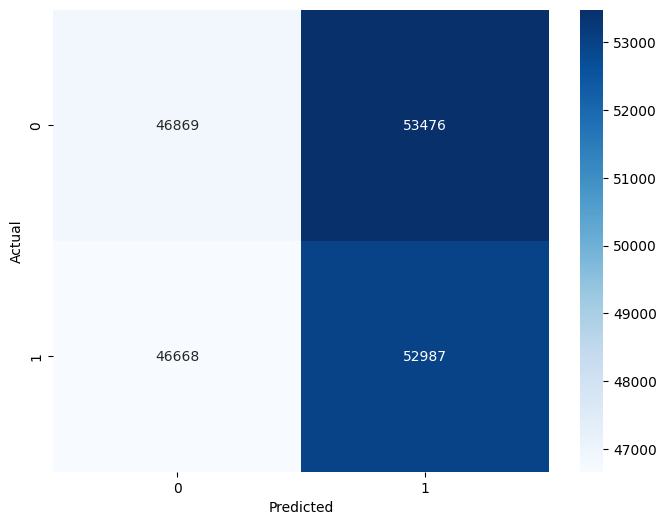

In [57]:
# evaluar el modelo con matriz de confusion 

from sklearn.metrics import confusion_matrix

y_pred = lr.predict(X_test)

confusion_matrix(y_test, y_pred)

# grafiar la matriz de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

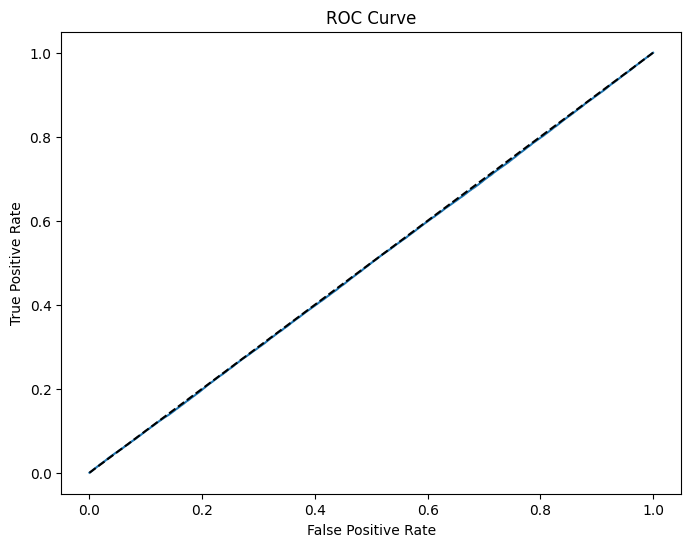

In [58]:
# graficar curva ROC 

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [59]:
# hacer un modelo de random forest con sklearn y evaluarlo con matriz de confusion y curva ROC
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo de Random Forest
rf = RandomForestClassifier() # Aquí el modelo hará 100 decision trees 

# Entrenar el modelo con los datos de entrenamiento
rf.fit(X_train, y_train)

# Predecir los valores del conjunto de prueba
y_pred = rf.predict(X_test)

# Calcular la matriz de confusión
confusion_matrix(y_test, y_pred)

# Calcular la precisión del modelo en el conjunto de prueba
rf.score(X_test, y_test)

# Capturar la precisión del modelo en el conjunto de entrenamiento
train_score = rf.score(X_train, y_train)


In [ ]:
# dame la presicion del modelo en el conjunto de prueba 
test_score = rf.score(X_test, y_test)

train_score, test_score

(1.0, 0.50247)

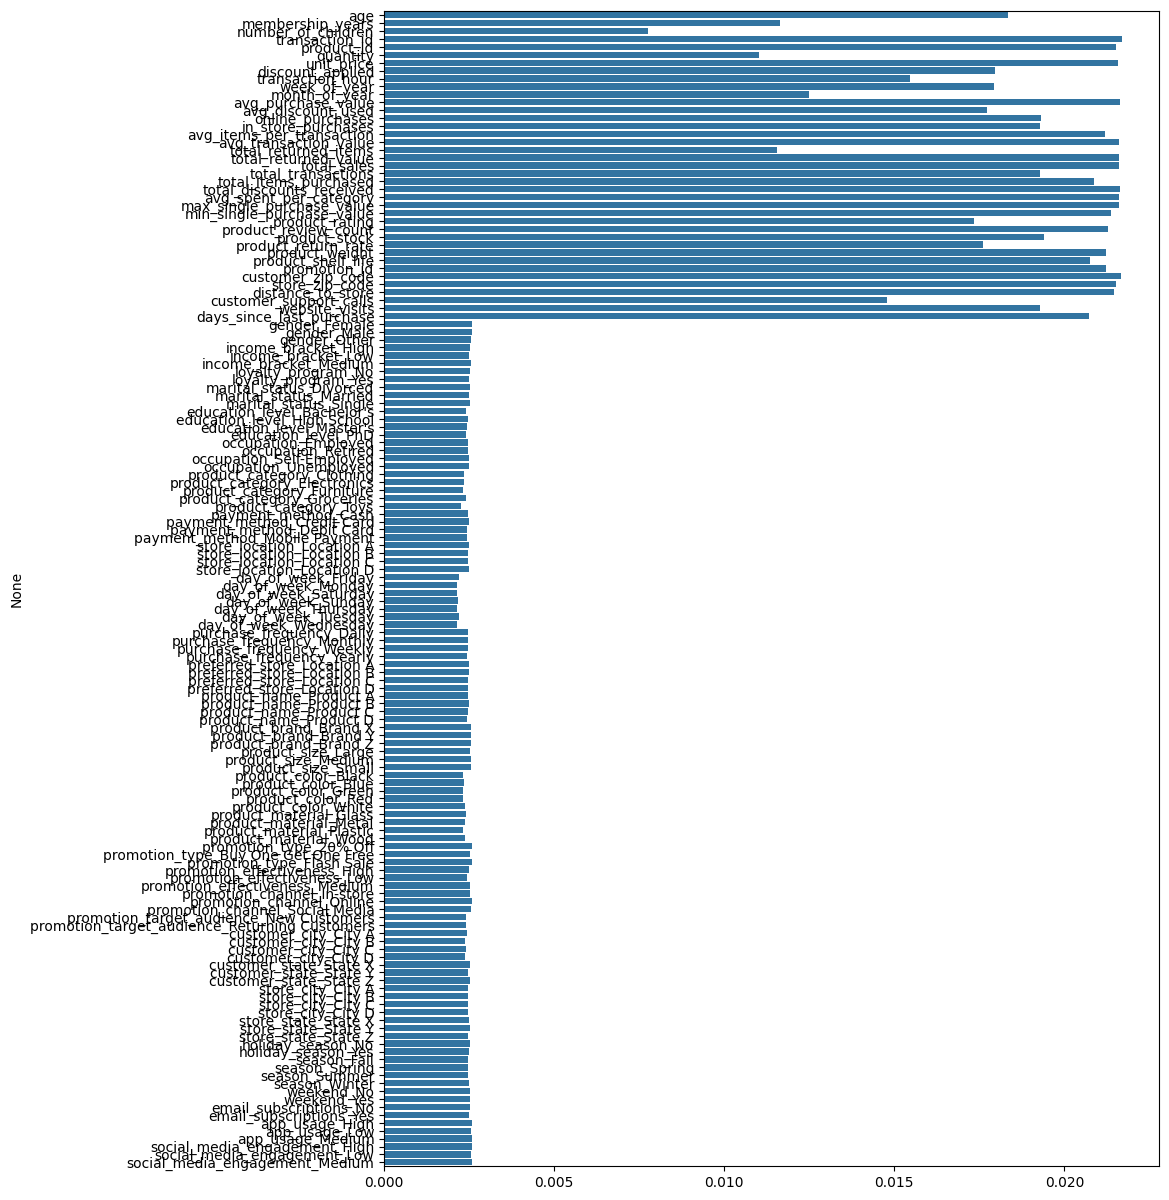

In [ ]:
# grafica cuales son las variables mas importantes en el modelo de random forest

plt.figure(figsize=(10, 15))
sns.barplot(x=rf.feature_importances_, y=X.columns)
plt.show()


In [ ]:
# almacena en una lista las top 10 variables mas importantes en el modelo de random forest

top_20_features = X.columns[np.argsort(rf.feature_importances_)[::-1]][:20]

In [ ]:
top_20_features

Index(['transaction_id', 'customer_zip_code', 'total_discounts_received',
       'avg_purchase_value', 'total_returned_value', 'avg_transaction_value',
       'avg_spent_per_category', 'max_single_purchase_value', 'total_sales',
       'unit_price', 'product_id', 'store_zip_code', 'distance_to_store',
       'min_single_purchase_value', 'product_review_count', 'product_weight',
       'promotion_id', 'avg_items_per_transaction', 'total_items_purchased',
       'product_shelf_life'],
      dtype='object')